时间花费 -- OSTU:3.543 secs / iterative:2.402 secs


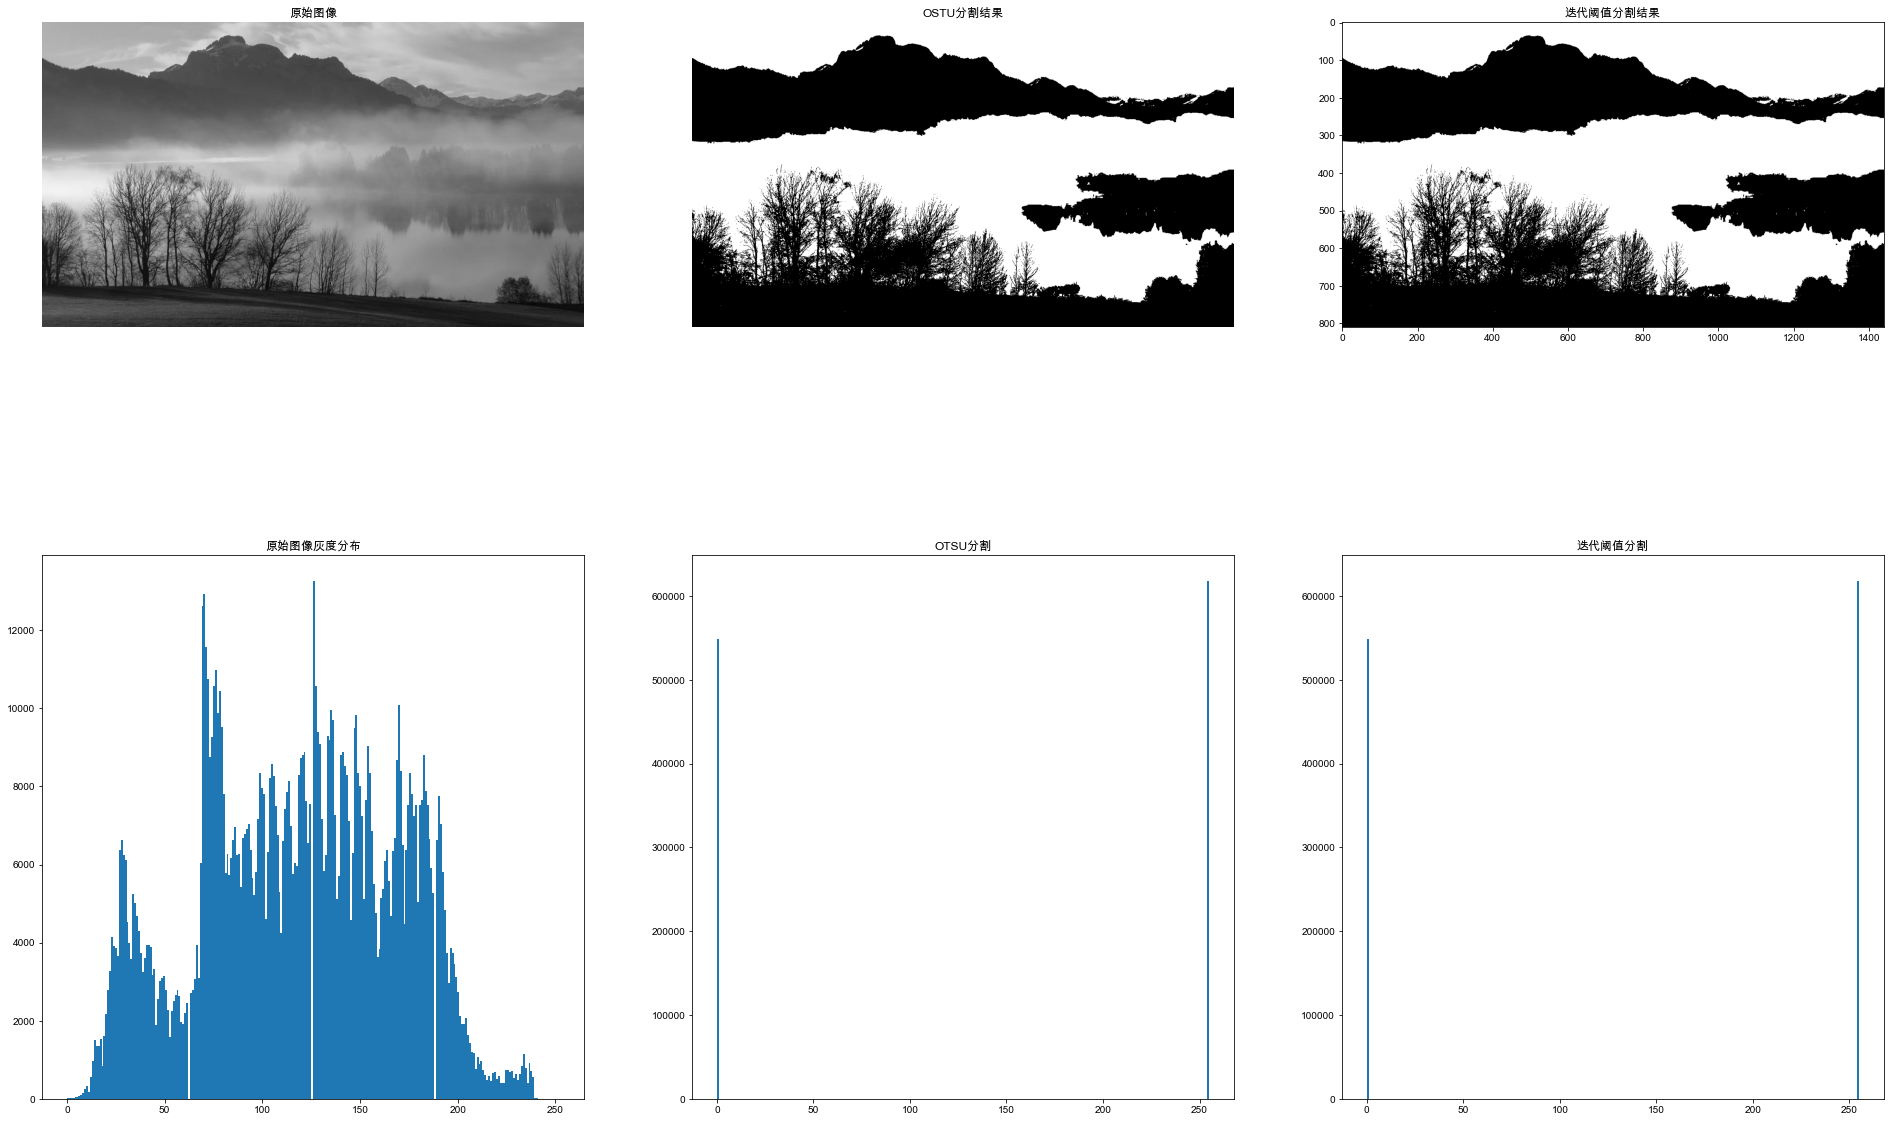

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/Arial Unicode.ttf")
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False

def otsu(img_gray, GrayScale):
    start_time =time.time()  # 记录开始时间
    height = img_gray.shape[0]
    width = img_gray.shape[1]
    result = np.zeros(img_gray.shape, np.uint8) # 存储阈值分割结果
    img_gray = np.array(img_gray).ravel().astype(np.uint8)
    u1=0.0#背景像素的平均灰度值
    u2=0.0#前景像素的平均灰度值
    th=0.0
    # 总的像素数目
    PixSum=img_gray.size
    # 各个灰度值的像素数目
    PixCount=np.zeros(GrayScale)
    # 各灰度值所占总像素数的比例
    PixRate=np.zeros(GrayScale)
    # 统计各个灰度值的像素个数
    for i in range(PixSum):
        #  默认灰度图像的像素值范围为GrayScale
        Pixvalue=img_gray[i]
        PixCount[Pixvalue]=PixCount[Pixvalue]+1

    # 确定各个灰度值对应的像素点的个数在所有的像素点中的比例。
    for j in range(GrayScale):
        PixRate[j]=PixCount[j]*1.0/PixSum
    Max_var = 0
    # 确定最大类间方差对应的阈值
    for i in range(1,GrayScale):#从1开始是为了避免w1为0.
        u1_tem=0.0
        u2_tem=0.0
        #背景像素的比列
        w1=np.sum(PixRate[:i])
        #前景像素的比例
        w2=1.0-w1
        if w1==0 or w2==0:
            pass
        else:#背景像素的平均灰度值
            for m in range(i):
                u1_tem=u1_tem+PixRate[m]*m
            u1 = u1_tem * 1.0 / w1
             #前景像素的平均灰度值
            for n in range(i,GrayScale):
                u2_tem = u2_tem + PixRate[n]*n
            u2 = u2_tem / w2
            #G=w1*w2*(u1-u2)**2
            tem_var=w1*w2*np.power((u1-u2),2)
            #判断当前类间方差是否为最大值。
            if Max_var<tem_var:
                Max_var=tem_var#深拷贝，Max_var与tem_var占用不同的内存空间。
                th=i
    # 利用所求阈值对原灰度图进行分割
    for i in range(height):
        for j in range(width):
            if img_gray[width*i+j] > th:
                result[i, j] = 255
    end_time = time.time()  # 记录结束时间
    return result, end_time - start_time
# 迭代算法阈值分割的实现
def iteration(img_gray):

    start_time =time.time()  # 记录开始时间
    height = img_gray.shape[0]
    width = img_gray.shape[1]
    result = np.zeros(img_gray.shape, np.uint8) # 存储阈值分割结果
    T = img_gray.mean()# 取初始阈值为图像灰度的平均值
    count = 0
    while True:
        # 分别计算阈值分割后两部门图像的平均灰度值
        # 两部分的平均灰度的平均值作为新的阈值t
        t0 = img_gray[img_gray<T].mean()
        t1 = img_gray[img_gray>=T].mean()
        t = (t0+t1)/2
        if abs(T-t)<1:  # 当两次全局阈值的差值小于1 结束迭代
            break
        T = t
        count += 1 # 统计迭代次数
    T = int(T)
    for i in range(height):
        for j in range(width):
            if img_gray[i, j]> T:
                result[i, j] = 255
    end_time = time.time()  # 记录结束时间
    return result, end_time - start_time

if __name__ == "__main__":
    img = cv.imread('img/haze.png', 0)
    img_OTSU, time_ostu = otsu(img,256)
    img_Iteration, time_iterative = iteration(img)
    # 展示图片效果
    plt.figure(figsize=(33, 22))
    plt.subplot(231)
    plt.imshow(img, cmap='gray')
    plt.title('原始图像')
    plt.axis('off')
    plt.subplot(232)
    plt.imshow(img_OTSU, cmap='gray')
    plt.title('OSTU分割结果')
    plt.axis('off')
    plt.subplot(233)
    plt.imshow(img_Iteration, cmap='gray')
    plt.title('迭代阈值分割结果')
    plt.subplot(234)
    plt.hist(img.reshape(-1), bins = 256)
    plt.axis('on')
    plt.title('原始图像灰度分布')
    plt.subplot(235)
    plt.hist(img_OTSU.reshape(-1), bins = 256)
    plt.axis('on')
    plt.title('OTSU分割')
    plt.subplot(236)
    plt.hist(img_OTSU.reshape(-1), bins = 256)
    plt.axis('on')
    plt.title('迭代阈值分割')
    plt.axis('on')
    
    print(f'时间花费 -- OSTU:{time_ostu:.3f} secs / iterative:{time_iterative:.3f} secs')